In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# from ggplot import *

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
contra_data = pd.read_csv("/Users/verbal/Desktop/Projects/verbal/gov_cas/SFIContradictions/SFIContra-experiment-table.csv") 


In [3]:
contra_data

,run-number,self_weight,percieved_consensus_len,step,abs_global_vs_popular_vote
0,6,0.00,1,100,0.605087
1,7,0.00,1,100,0.152794
2,2,0.00,1,100,0.549858
3,8,0.00,1,100,0.223408
4,5,0.00,1,100,0.436670
5,4,0.00,1,100,0.130285
6,3,0.00,1,100,0.685411
7,12,0.00,1,100,0.697631
8,9,0.00,1,100,0.462883
9,10,0.00,1,100,0.102081


In [4]:
contra_data = contra_data.drop(['step','run-number'], axis=1)

In [5]:
mdf1 = contra_data[contra_data['percieved_consensus_len'] == 1]
mdf2 = contra_data[contra_data['percieved_consensus_len'] == 2]
mdf3 = contra_data[contra_data['percieved_consensus_len'] == 5]
mdf4 = contra_data[contra_data['percieved_consensus_len'] == 10]
mdf5 = contra_data[contra_data['percieved_consensus_len'] == 20]

In [6]:
grouped1 = mdf1.groupby(['self_weight']).mean()
grouped2 = mdf2.groupby(['self_weight']).mean()
grouped3 = mdf3.groupby(['self_weight']).mean()
grouped4 = mdf4.groupby(['self_weight']).mean()
grouped5 = mdf5.groupby(['self_weight']).mean()

In [7]:
group = grouped1
group = group.rename(index=str, columns={"abs_global_vs_popular_vote": "C-len=1"})
group['C-len=2'] = grouped2.abs_global_vs_popular_vote
group['C-len=5'] = grouped3.abs_global_vs_popular_vote
group['C-len=10'] = grouped4.abs_global_vs_popular_vote
group['C-len=20'] = grouped5.abs_global_vs_popular_vote

In [8]:
group = group.drop(['percieved_consensus_len'], axis=1)


In [9]:
group

,C-len=1,C-len=2,C-len=5,C-len=10,C-len=20
self_weight,,,,,
0.0,0.398495,0.259978,0.157447,0.084025,0.089436
0.25,0.298344,0.130853,0.105401,0.089092,0.062755
0.5,0.193974,0.131458,0.130600,0.060374,0.048932
0.75,0.108873,0.111897,0.083926,0.076451,0.068151
1.0,0.082668,0.095063,0.110166,0.088546,0.079474


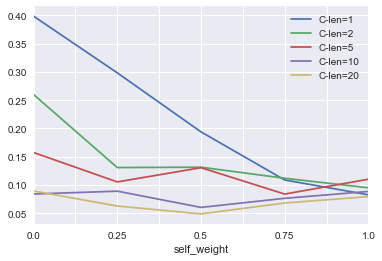

In [10]:
lines = group.plot.line()